# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bd=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [4]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
bd.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
bd.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

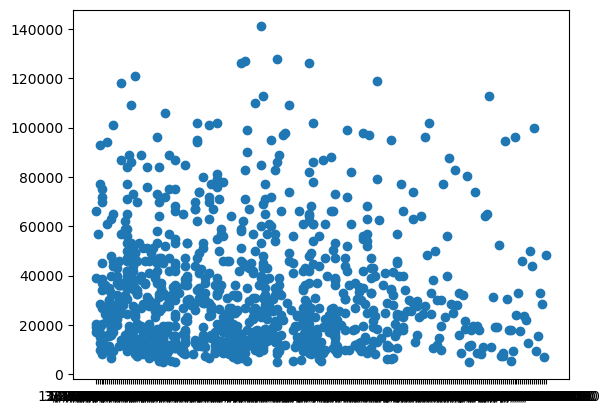

In [7]:
fig,ax=plt.subplots()
ax.scatter(bd["saledate"][:1000],bd["SalePrice"][:1000])

In [8]:
bd.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [9]:
bd.saledate.dtype

dtype('O')

<Axes: ylabel='Frequency'>

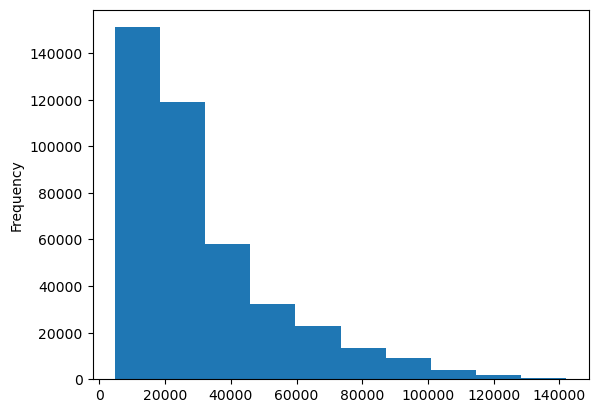

In [10]:
bd.SalePrice.plot.hist()

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [11]:
# Import data again but this time parse dates
bd=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [12]:
bd.saledate.dtype

dtype('<M8[ns]')

In [13]:
bd.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [14]:
bd.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


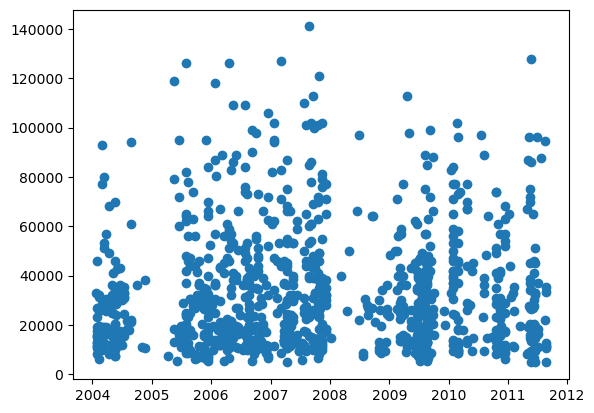

In [15]:
fig,ax=plt.subplots()
ax.scatter(bd["saledate"][:1000],bd["SalePrice"][:1000])

In [16]:
bd.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [17]:
# Sort DataFrame in date order
bd.sort_values(by=["saledate"],inplace=True,ascending=True)

In [18]:
bd.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [19]:
# Make a copy of the original DataFrame to perform edits on
bd_tmp = bd.copy()

### Add datetime parameters for `saledate` column


In [20]:
bd_tmp["saleYear"] = bd_tmp.saledate.dt.year
bd_tmp["saleMonth"] = bd_tmp.saledate.dt.month
bd_tmp["saleDay"] = bd_tmp.saledate.dt.day
bd_tmp["saleDayOfWeek"] = bd_tmp.saledate.dt.dayofweek
bd_tmp["saleDayOfYear"] = bd_tmp.saledate.dt.dayofyear


In [21]:
bd_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [22]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
bd_tmp.drop("saledate", axis=1, inplace=True)

In [23]:
# Check the values of different columns
bd_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [24]:
len(bd_tmp)

412698

## 5. Modelling 

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [25]:
bd_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [26]:
bd_tmp["UsageBand"].dtype

dtype('O')

In [27]:
bd_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [28]:
bd_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [29]:
pd.api.types.is_string_dtype(bd_tmp["UsageBand"])

True

In [30]:
# Find the columns which contain strings
for lbl,content in bd_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(lbl)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [31]:
# This will turn all of the string value into category values
for lbl,content in bd_tmp.items():
    if pd.api.types.is_string_dtype(content):
        bd_tmp[lbl]=content.astype("category").cat.as_ordered()

In [32]:
bd_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
bd_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [34]:
# Check missing data
bd_tmp.isnull().sum()/len(bd_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [35]:
# Export current tmp dataframe
bd_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv",
              index=False)

In [36]:
# Import preprocessed data
bd_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)
bd_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [37]:
bd_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values 

### Fill numerical missing values first

In [38]:
for lbl,content in bd_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(lbl)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [39]:
bd_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [40]:
# Check for which numeric columns have null values
for lbl, content in bd_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(lbl)

auctioneerID
MachineHoursCurrentMeter


In [41]:
# Fill numeric rows with the median
for lbl, content in bd_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            bd_tmp[lbl+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            bd_tmp[lbl] = content.fillna(content.median())

In [42]:
# Check if there's any null numeric values
for lbl, content in bd_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(lbl)

In [108]:
bd_tmp.auctioneerID

0         18.0
1         99.0
2         99.0
3         99.0
4         99.0
          ... 
412693    99.0
412694    99.0
412695    99.0
412696    99.0
412697    99.0
Name: auctioneerID, Length: 412698, dtype: float64

In [43]:
# Check to see how many examples were missing
bd_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [111]:
bd_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

### Filling and turning categorical variables into numbers

In [45]:
# Check for columns which aren't numeric
for lbl, content in bd_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(lbl)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [46]:
# Turn categorical variables into numbers and fill missing
for lbl, content in bd_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        bd_tmp[lbl+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        bd_tmp[lbl] = pd.Categorical(content).codes+1

In [47]:
bd_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [48]:
bd_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [49]:
bd_tmp.saleDayOfWeek

0         1
1         1
2         1
3         1
4         1
         ..
412693    5
412694    5
412695    5
412696    5
412697    5
Name: saleDayOfWeek, Length: 412698, dtype: int64

In [50]:
%%time
# Instantiate model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_jobs=-1,random_state=29)

# Fit the model
xtr=bd_tmp.drop("SalePrice",axis=1)
ytr=bd_tmp["SalePrice"]

CPU times: total: 859 ms
Wall time: 7.39 s


In [51]:
xtr.saleDayOfWeek

0         1
1         1
2         1
3         1
4         1
         ..
412693    5
412694    5
412695    5
412696    5
412697    5
Name: saleDayOfWeek, Length: 412698, dtype: int64

In [52]:
rfr.fit(xtr,ytr)

RandomForestRegressor(n_jobs=-1, random_state=29)

In [91]:
import pickle

In [97]:
pickle.dump(rfr,open('model.pkl','wb'))

In [53]:
#score the model
rfr.score(xtr,ytr)

0.9876130179220691

In [98]:
mdl=pickle.load(open('model.pkl','rb'))

In [102]:
mdl.score(xtr,ytr)

0.9876130179220691

**Question:** Why doesn't the above metric hold water? (why isn't the metric reliable)

### Splitting data into train/validation sets

In [54]:
# Split data into training and validation
bd_val = bd_tmp[bd_tmp.saleYear == 2012]
bd_train = bd_tmp[bd_tmp.saleYear != 2012]

len(bd_val), len(bd_train)

(11573, 401125)

In [107]:
bd_train.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saleYear, Length: 401125, dtype: int64

In [55]:
bd_val.saleDayOfWeek

401125    6
401126    2
401127    2
401128    2
401129    2
         ..
412693    5
412694    5
412695    5
412696    5
412697    5
Name: saleDayOfWeek, Length: 11573, dtype: int64

In [56]:
# Split data into x & y
xtr1,ytr1 = bd_train.drop("SalePrice", axis=1), bd_train.SalePrice
xv, yv = bd_val.drop("SalePrice", axis=1), bd_val.SalePrice

xtr1.shape, ytr1.shape, xv.shape, yv.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [57]:
xtr1.saleDayOfWeek

0         1
1         1
2         1
3         1
4         1
         ..
401120    4
401121    4
401122    4
401123    4
401124    4
Name: saleDayOfWeek, Length: 401125, dtype: int64

In [58]:
ytr

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
412693    16000.0
412694     6000.0
412695    16000.0
412696    55000.0
412697    34000.0
Name: SalePrice, Length: 412698, dtype: float64

### Building an evaluation function

In [59]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(xtr1)
    val_preds = model.predict(xv)
    scores = {"Training MAE": mean_absolute_error(ytr1, train_preds),
              "Valid MAE": mean_absolute_error(yv, val_preds),
              "Training RMSLE": rmsle(ytr1, train_preds),
              "Valid RMSLE": rmsle(yv, val_preds),
              "Training R^2": r2_score(ytr1, train_preds),
              "Valid R^2": r2_score(yv, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [60]:
len(xtr1)

401125

In [61]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=29,
                              max_samples=10000)

In [62]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(xtr1, ytr1)

CPU times: total: 1min 43s
Wall time: 11.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=29)

In [63]:
(xtr1.shape[0] * 100) / 1000000

40.1125

In [64]:
show_scores(model)

{'Training MAE': 5556.493772789032,
 'Valid MAE': 7175.090452778018,
 'Training RMSLE': 0.25771345050631783,
 'Valid RMSLE': 0.29444024686780906,
 'Training R^2': 0.8608098950009938,
 'Valid R^2': 0.8329456783631296}

### Hyerparameter tuning with RandomizedSearchCV

In [65]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=29),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(xtr1,ytr1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


D:\Software\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Software\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Software\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

CPU times: total: 33.4 s
Wall time: 47.3 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=29),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [66]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [67]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 7345.4602835710475,
 'Valid MAE': 8831.196543038788,
 'Training RMSLE': 0.32695660693968503,
 'Valid RMSLE': 0.36062133870258,
 'Training R^2': 0.7739614052287628,
 'Valid R^2': 0.7666463217929296}

### Train a model with the best hyperparamters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`.

In [68]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=6,
                                    min_samples_split=9,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=29) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(xtr1,ytr1)

CPU times: total: 7min 20s
Wall time: 46.7 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=6, min_samples_split=9,
                      n_estimators=30, n_jobs=-1, random_state=29)

In [69]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 3367.287903790892,
 'Valid MAE': 5999.995941831664,
 'Training RMSLE': 0.1646748470196255,
 'Valid RMSLE': 0.24700754999335836,
 'Training R^2': 0.9447901681486536,
 'Valid R^2': 0.8777142633383934}

## Make predictions on test data

In [70]:
# Import the test data
bd_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

bd_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [71]:
xtr1.saleDayOfWeek

0         1
1         1
2         1
3         1
4         1
         ..
401120    4
401121    4
401122    4
401123    4
401124    4
Name: saleDayOfWeek, Length: 401125, dtype: int64

### Preprocessing the data (getting the test dataset in the same format as our training dataset)


In [72]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [73]:
# Process the test data 
bd_test = preprocess_data(bd_test)
bd_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [74]:
# We can find how the columns differ using sets
set(xtr1.columns) - set(bd_test.columns)

{'auctioneerID_is_missing'}

In [75]:
# Manually adjust bd_test to have auctioneerID_is_missing column
bd_test["auctioneerID_is_missing"] = False
bd_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


# We can find how the columns differ using sets

In [76]:
set(xtr1.columns)-set(bd_test.columns)

set()

In [77]:
bd_test=bd_test.reindex(xtr1.columns,axis=1)

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [78]:
# Make predictions on the test data
test_preds = ideal_model.predict(bd_test)

In [79]:
test_preds

array([19063.55050451, 16444.48107122, 51784.39817879, ...,
       12270.04265411, 15244.81431945, 28253.74194519])

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [80]:
# Format predictions into the same format Kaggle is after
bd_preds=pd.DataFrame()
bd_preds["SalesID"]=bd_test["SalesID"]
bd_preds["SalesPrice"]=test_preds
bd_preds

,SalesID,SalesPrice
0,1227829,19063.550505
1,1227844,16444.481071
2,1227847,51784.398179
3,1227848,70873.898819
4,1227863,54496.502159
...,...,...
12452,6643171,45633.160353
12453,6643173,10627.872826
12454,6643184,12270.042654
12455,6643186,15244.814319


In [81]:
# Export prediction data
bd_preds.to_csv("bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [82]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.36988987e-02, 1.95007675e-02, 4.01100562e-02, 2.03006747e-03,
       2.67452354e-03, 2.01121012e-01, 2.61549010e-03, 9.15473585e-04,
       4.20387534e-02, 4.90445071e-02, 6.44042438e-02, 4.67418421e-03,
       1.21873818e-02, 1.52139775e-01, 4.41285900e-02, 5.12660948e-03,
       4.82649407e-03, 1.91158015e-03, 3.05193135e-03, 7.22773770e-02,
       2.56690032e-04, 7.38553868e-05, 6.53280617e-04, 1.98055223e-04,
       1.53133073e-03, 1.71982396e-05, 5.95106562e-03, 8.78097290e-03,
       6.31424856e-04, 9.23402671e-04, 2.88286102e-03, 8.56527897e-04,
       2.31619375e-03, 1.78024633e-03, 2.89499314e-03, 4.92103933e-03,
       5.78440997e-04, 1.25837691e-02, 1.15654652e-03, 2.63831320e-03,
       8.08651185e-04, 6.86314625e-04, 9.94618227e-04, 5.38656032e-04,
       3.47491191e-04, 2.22080127e-04, 2.73865242e-04, 1.54466133e-03,
       1.00655553e-03, 3.75568484e-04, 3.36696527e-04, 7.25448497e-02,
       3.68225664e-03, 4.76081425e-03, 2.31872022e-03, 8.71473878e-03,
      

In [83]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

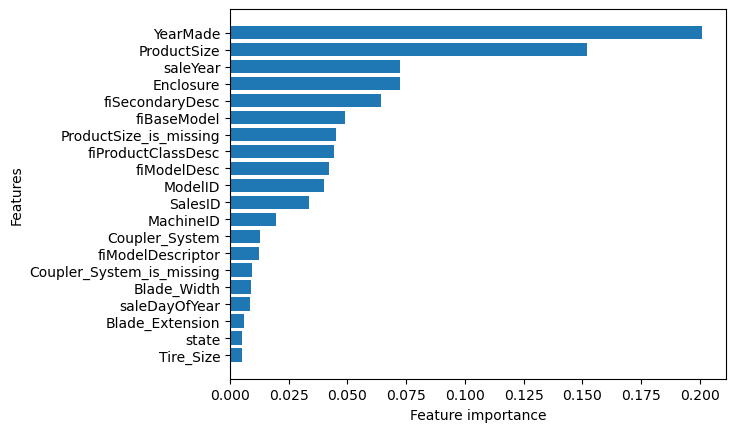

In [84]:
plot_features(xtr1.columns, ideal_model.feature_importances_)

In [85]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [86]:
from catboost import CatBoostRegressor

In [87]:
# Number of unique species in dataset 
ytr.nunique()

954

In [88]:
# No of Distributions
ytr.value_counts()

25000.0    7892
20000.0    7678
15000.0    7568
26000.0    7176
16000.0    7147
           ... 
13875.0       1
10225.0       1
8675.0        1
61750.0       1
56600.0       1
Name: SalePrice, Length: 954, dtype: int64

# Splitting the Dataset